# Generalized Linear Models 


## Problem #1
In January 1986, the space shuttle Challenger exploded shortly after launch. An investigation was launched into the cause of the crash and attention focused on the rubber O-ring seals in the rocket boosters. At lower temperatures, rubber becomes more brittle and is a less effective sealant. At the time of the launch, the temperature was 31°F. Could the failure of the O-rings have been predicted? In the 23 previous shuttle missions for which data exists, some evidence of damage due to blow by and erosion was recorded on some O-rings. Each shuttle had two boosters, each with three O-rings. For each mission, we know the number of O-rings out of six showing some damage and the launch temperature. 

The 'orings' is a data frame with 23 observations on the following 2 variables.

1. temp:  Ambient temperature (Fahrenheit) at launch time
2. damage: Number of damaged 'O' rings (out of a total of 6)

#### (a) Construct a new variable called prop, which is the proportion of damaged 'O' rings. Plot prop against temperature. What do you notice about this plot?

In [1]:
rm(list = ls())
library(faraway)
library(MASS)
#library(aod) #wald.test
#library(lmtest) #lrtest (likelihood ratio test--same as anova)

data(orings)
head(orings)

temp,damage
53,5
57,1
58,1
63,1
66,0
67,0


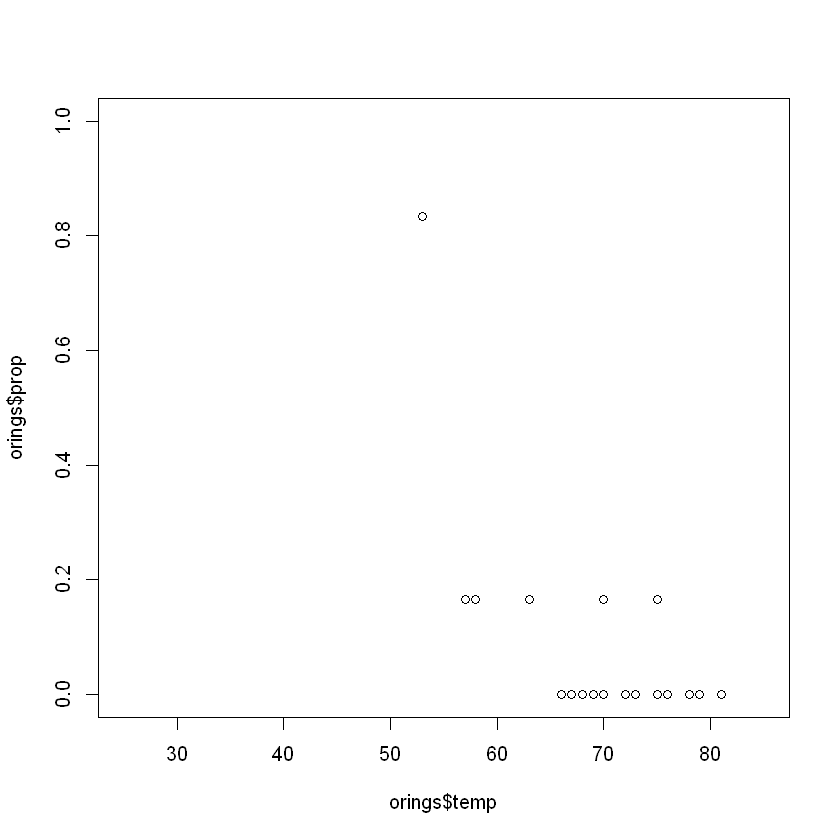

In [51]:
plot(orings$temp, orings$prop, xlim=c(25, 85), ylim=c(0, 1))

#### As we can see from the above chart, as temperature goes up, the proportion of damaged 'O' rings go down.

#### (b) Let's use the 'glm' function for fitting the logit model (logistic regression). The first argument will be the model: RESPONSE ~ PREDICTORS. For binomial response data, we need two pieces of information about the response values—y and n. Thus for binomial families, the response can be specified as a two-column matrix with the columns giving the numbers of successes and failures. You'll also need to specify the family argument, and the data argument. Other arguments should include 'data' and 'family'. Use ?glm to specify these arguments.


In [46]:
Y <- as.matrix(orings %>% mutate(undamage = 6 - damage) %>% select(damage, undamage))

glmod1 <- glm(Y ~ temp, data=orings, family='binomial')

summary(glmod1)


Call:
glm(formula = Y ~ temp, family = "binomial", data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


#### (c) Plot the data again with the logit model. You can do this easily with the ilogit function.

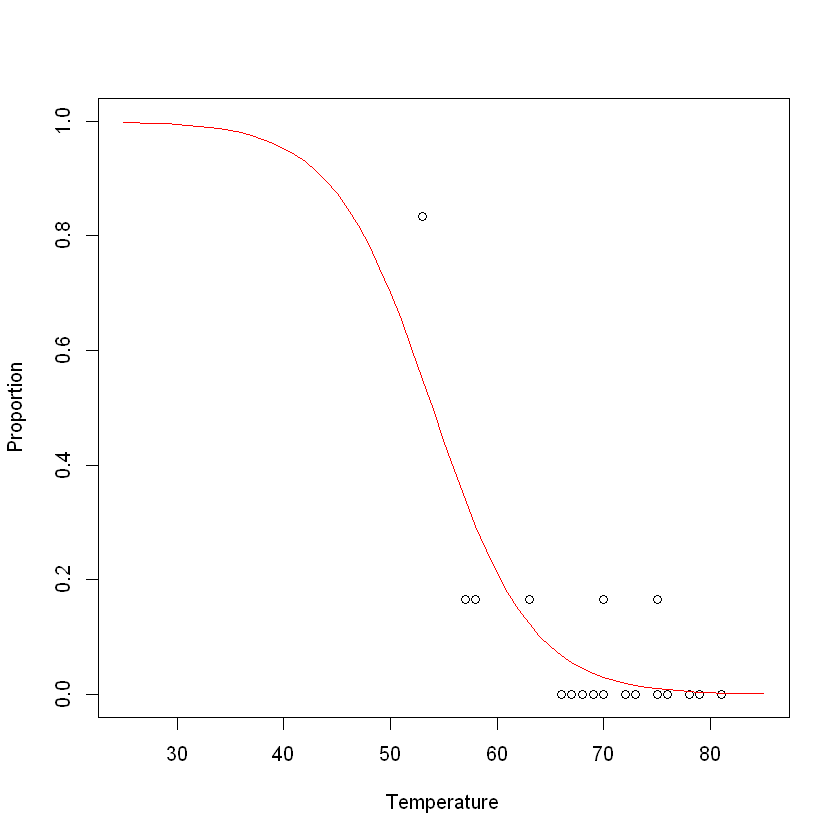

In [56]:
plot(orings$temp, orings$prop, xlim=c(25, 85), ylim=c(0, 1), xlab='Temperature', ylab='Proportion')
x <- seq(25, 85, 1)
lines(x, ilogit(11.66299 - 0.21623*x), col='red')

#### (d) Now let's check the interpretation of $\widehat{\beta}_1$. Create a new temperature value of 45 and 46 degrees. Calculuate the odds of failure at 45 and 46 degrees. What is the ratio of these two odds? 

In [4]:
odds1 <- exp(11.66299 - 0.21623*45)
odds2 <- exp(11.66299 - 0.21623*46)

cat ('The odds of failure at 45 degrees is:', odds1, '\n')
cat ('The odds of failure at 46 degrees is:', odds2, '\n')
cat ('The ratio of these two odds is:', odds1/odds2)

The odds of failure at 45 degrees is: 6.907723 
The odds of failure at 46 degrees is: 5.564516 
The ratio of these two odds is: 1.241388

#### (e) Compute confidence intervals for the model parameters "by hand".

In [65]:
summary(glmod1)


Call:
glm(formula = Y ~ temp, family = "binomial", data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


In [88]:
alpha <- 0.05

CI.intercept <- c(glmod$coefficients[1] + qnorm(alpha/2)*3.29629, glmod$coefficients[1] - qnorm(alpha/2)*3.29629)

CI.temp <- c(glmod$coefficients[2] + qnorm(alpha/2)*0.05318, glmod$coefficients[2] - qnorm(alpha/2)*0.05318)

cat('95% confidence interval for intercept is:', CI.intercept, '\n')
cat('95% confidence interval for temp is:', CI.temp)

95% confidence interval for intercept is: 5.20238 18.1236 
95% confidence interval for temp is: -0.3204645 -0.1120028

#### (f) Now compute them using confint(glmod). Notice that these intervals are slightly different; they are based on the profile likelihood and do not assume asymptotic normality. They are more accurate for small sample sizes. Profile likelihood confidence intervals don’t assume normality of the estimator and appear to perform better for small samples sizes than Wald CIs (above). They are, nonetheless, still based on an asymptotic approximation – the asymptotic chi-square distribution of the log likelihood ratio test statistic. (for more info: http://www.math.umt.edu/patterson/ProfileLikelihoodCI.pdf)

In [90]:
confint(glmod1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),5.575195,18.737598
temp,-0.332657,-0.120179


#### (g) Predict the probability of faulire at Temp = 45 degrees.


In [96]:
cat ('The probability of faulire at Temp = 45 degrees is:', ilogit(glmod$coefficients[1] + glmod$coefficients[2]*45))

The probability of faulire at Temp = 45 degrees is: 0.8735231

## Problem #2 

A researcher is interested in how variables, such as gre (Graduate Record Exam scores), gpa (grade point average) and prestige of the undergraduate institution (rank), effect admission into graduate school. The response variable, admit/don't admit, is a binary variable.



In [98]:
admission = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(admission)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


#### (a) Perform logistic regression treating ${\tt admit}$ as the response. Be sure to treat ${\tt rank}$ as a categorical variable.

In [103]:
admission$rank <- as.factor(admission$rank)
glmod2 <- glm(admit ~ gre + gpa + rank, data=admission, family=binomial)
summary(glmod2)


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial, data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


#### (b) Construct a reduced model without the ${\tt rank}$ variable. Conduct the likelihood ratio test to decide whether the reduced model is sufficient. You can do this using ${\tt anova}$ or ${\tt lrtest}$.

In [108]:
glmod3 <- glm(admit ~ gre + gpa, data=admission, family=binomial)
anova(glmod3, glmod2, test='Chi')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
397,480.3440,NA,NA,NA
394,458.5175,3,21.82649,7.088456e-05


### Since the p-value is way smaller than 0.05, so we will reject the null hypothesis, thses we need the full model.

## Problem #3

For each 30 Galapagos islands, we have a count of the number of plant species found on each island and the number that are endemic to that island. We also have five geographic variables for each island. 

1. Species: the number of plant species found on the island
2. Endemics: the number of endemic species
3. Area: the area of the island (km$^2$)
4. Elevation: the highest elevation of the island (m)
5. Nearest: the distance from the nearest island (km)
6. Scruz: the distance from Santa Cruz island (km)
7. Adjacent: the area of the adjacent island (square km)

#### (a) Remove the Endemics variable from the dataframe, and fit a linear model with Species as the respons and all other variables as predictors. Run some diagnostics and explain why this model is not the best fit.

In [10]:
library(faraway)
data(gala)
head(gala)
gala <- gala[-2]

,Species,Endemics,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,23,25.09,346,0.6,0.6,1.84
Bartolome,31,21,1.24,109,0.6,26.3,572.33
Caldwell,3,3,0.21,114,2.8,58.7,0.78
Champion,25,9,0.10,46,1.9,47.4,0.18
Coamano,2,1,0.05,77,1.9,1.9,903.82
Daphne.Major,18,11,0.34,119,8.0,8.0,1.84


In [11]:
lmod1 <- lm(Species ~ ., data=gala)
summary(lmod1)


Call:
lm(formula = Species ~ ., data = gala)

Residuals:
     Min       1Q   Median       3Q      Max 
-111.679  -34.898   -7.862   33.460  182.584 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.068221  19.154198   0.369 0.715351    
Area        -0.023938   0.022422  -1.068 0.296318    
Elevation    0.319465   0.053663   5.953 3.82e-06 ***
Nearest      0.009144   1.054136   0.009 0.993151    
Scruz       -0.240524   0.215402  -1.117 0.275208    
Adjacent    -0.074805   0.017700  -4.226 0.000297 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.98 on 24 degrees of freedom
Multiple R-squared:  0.7658,	Adjusted R-squared:  0.7171 
F-statistic:  15.7 on 5 and 24 DF,  p-value: 6.838e-07


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

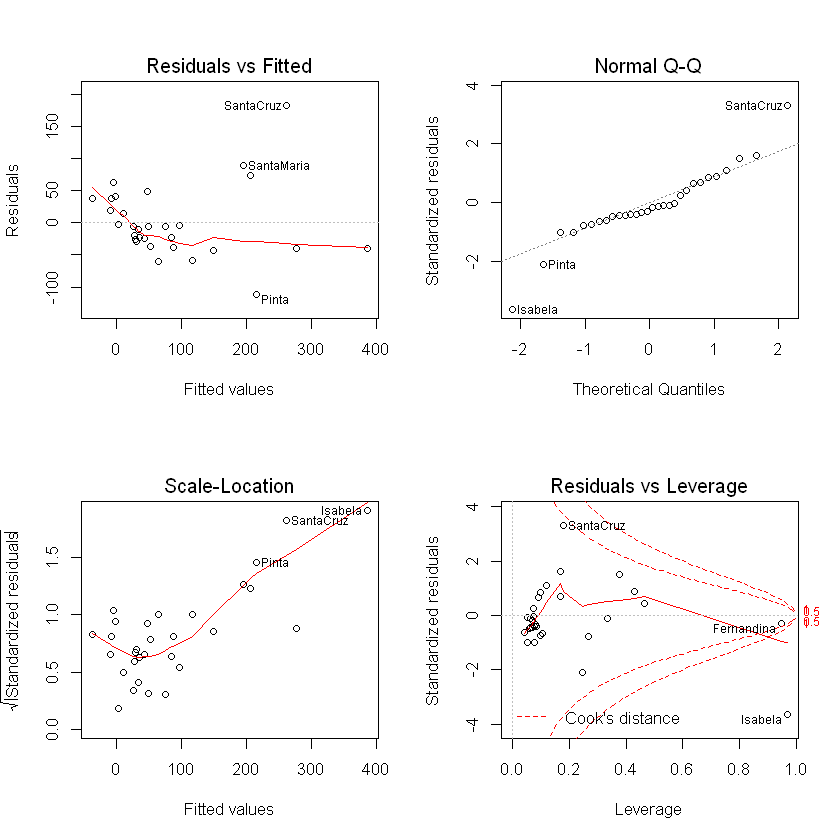

In [12]:
par(mfrow=c(2,2))
plot(lmod1)

#### Based on the above we cannot consider the model to be a good fit. We can note that there is a curve in the residual plot and hence we can conclude that the linearity assumpation is violated. Also, the R-squared value is not that high.

#### (b) Recall that a square root transformation of the response might be helpful when the nonconstant variance assumption is violated. Try this transformation. 

In [13]:
lmod2 <- lm(sqrt(Species) ~ ., data=gala)
summary(lmod2)


Call:
lm(formula = sqrt(Species) ~ ., data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5572 -1.4969 -0.3031  1.3527  5.2110 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.3919243  0.8712678   3.893 0.000690 ***
Area        -0.0019718  0.0010199  -1.933 0.065080 .  
Elevation    0.0164784  0.0024410   6.751 5.55e-07 ***
Nearest      0.0249326  0.0479495   0.520 0.607844    
Scruz       -0.0134826  0.0097980  -1.376 0.181509    
Adjacent    -0.0033669  0.0008051  -4.182 0.000333 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.774 on 24 degrees of freedom
Multiple R-squared:  0.7827,	Adjusted R-squared:  0.7374 
F-statistic: 17.29 on 5 and 24 DF,  p-value: 2.874e-07


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

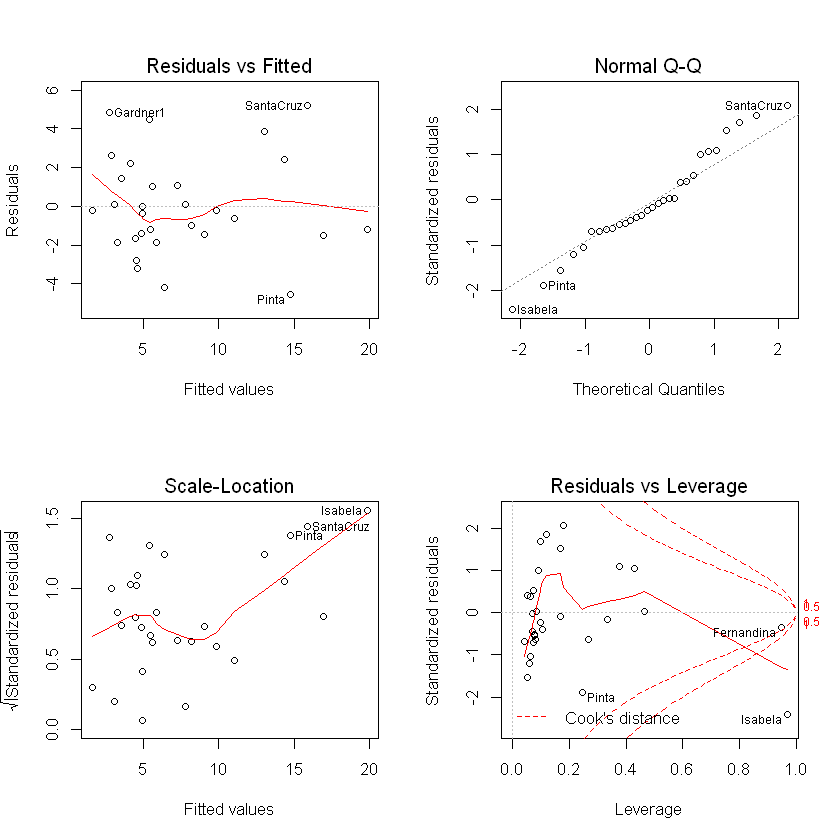

In [144]:
par(mfrow=c(2,2))
plot(lmod2)

#### Based on the above plots, we can consider that the the linearity issue got better. However, the nomarlity assumption got worse.

#### (c) One issue with a transformation is that it makes interpretation less natural. Let's try a Poisson regression (with no transformation on the repsonse).

In [14]:
glmod4 <- glm(Species ~ ., data=gala, family=poisson(link='log'))

summary(glmod4)


Call:
glm(formula = Species ~ ., family = poisson(link = "log"), data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


#### (d) Interpret the parameter associated with Nearest. 

#### If the distance from the nearest island is increased by 1 km, then on average, a multiplicitive effect of $e^{8.826 \times 10^{-3}}$ on the number of plant species found on the island.

#### (e) Calculate the deviance for Poisson regression. Does this value show up in the summary? Also, check the goodness of fit of this model using Pearson's $\chi^2$ statistic. What do you conclude about the fit?

In [167]:
lambda <- predict(glmod4, type='response')
y <- gala$Species
D <- 2*sum(y*log(y/lambda) - (y-lambda))
cat ('The deviance is', D, 'and it show up as the residual deviance.', '\n')

The deviance is 716.8458 and it show up as the residual deviance. 


In [171]:
cat ("The Pearson's Chi-squared statistic is:", sum(residuals(glmod4, type = "pearson")^2))

The Pearson's Chi-squared statistic is: 761.9792

In [178]:
anova(glmod4, test='Chisq')

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,29,3510.7286,NA
Area,1,895.13716,28,2615.5915,1.119301e-196
Elevation,1,802.05366,27,1813.5378,1.930010e-176
Nearest,1,15.71138,26,1797.8264,7.377911e-05
Scruz,1,456.37225,25,1341.4542,2.960463e-101
Adjacent,1,624.60840,24,716.8458,7.437937e-138


In [180]:
cat('The proportion of deviance explained by poisson regression is:', 1-(716.85/3510.73))

The proportion of deviance explained by this model is: 0.7958117

#### As noted above, the proportion of deviance explained by poisson regression is: 0.7958117,. This value is close to the linear model.

## Problem #4

Research another type of GLM (beyond binomial and Poisson), find a dataset that is reasonably modeled by that GLM, and model it. Does the model fit well?

### Data set wafer

In [6]:
data(wafer)
summary(wafer)

 x1    x2    x3    x4        resist     
 -:8   -:8   -:8   -:8   Min.   :165.7  
 +:8   +:8   +:8   +:8   1st Qu.:201.0  
                         Median :214.2  
                         Mean   :229.3  
                         3rd Qu.:259.3  
                         Max.   :339.9  

### Gamma linear model

In [7]:
glmod5 <- glm(resist ~ . ^2, family=Gamma(link=log), data=wafer)
summary(glmod5)


Call:
glm(formula = resist ~ .^2, family = Gamma(link = log), data = wafer)

Deviance Residuals: 
        1          2          3          4          5          6          7  
-0.042660   0.017512   0.016572   0.007758  -0.029264   0.052499   0.053416  
        8          9         10         11         12         13         14  
-0.080985   0.032802  -0.008745  -0.007790  -0.016766   0.037406  -0.063659  
       15         16  
-0.064652   0.085267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.307727   0.068178  77.851 6.63e-09 ***
x1+          0.186627   0.082226   2.270  0.07247 .  
x2+         -0.199099   0.082226  -2.421  0.06002 .  
x3+          0.436733   0.082226   5.311  0.00316 ** 
x4+          0.053277   0.082226   0.648  0.54560    
x1+:x2+      0.020007   0.082226   0.243  0.81742    
x1+:x3+     -0.154479   0.082226  -1.879  0.11907    
x1+:x4+      0.007866   0.082226   0.096  0.92751    
x2+:x3+     -0.176444   0.082226  -2.146  

### Goodness of Fit

In [9]:
cat ('The proportion of deviance explained by Gamma linear model is', 1 - (0.033882/0.697837), 'This value is quite high and its considered to be good.')

The proportion of deviance explained by Gamma linear model is 0.9514471 This value is quite high and its considered to be good.